In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
def stringGame(n: int, k: int) -> list: # Function that simulates tying k times in a bowl of n strings
    loops = []
    stringBowl = np.array([val for val in range(n) for _ in (0, 1)]) # Collection of ends of strings
    np.random.shuffle(stringBowl)

    connections = []
    for i in range(k):
        a,b = stringBowl[2*i:2*(i+1)] # Pairs up random ends
        connections.append([a,b])

    while connections: # Collects the connections into loops or discards remaining strings
        if connections[0][0] == connections[0][-1]:
            loops.append(connections[0])
            connections.pop(0)
        else:
            found = False
            for i in range(1, len(connections)):
                a = connections[0][0]
                if a in connections[i]:
                    found = True
                    if connections[i][0] == a:
                        connections[0].insert(0, connections[i][1])            
                    else:
                        connections[0].insert(0, connections[i][0])
                    connections.pop(i)
                    break
            if found == False:
                connections.pop(0)
    return loops

In [3]:
def trials(n: int, k: int, trialNum: int) -> list: # Runs the game a number of times
    results = []
    for _ in range(trialNum):
        results.append( len(stringGame(n, k)) )
    return results

In [4]:
def expectedLoops(n: int, k: int) -> float: # Calculates the true expected value of the number of loops by the summation
    total = 0
    for i in range((n-k+1), n+1):
        total += 1/((2*i) - 1)
    return total

def midPoint(n: int) -> float: # Calculates the additional value to be added to the approximation to be the midpoints
    d = ((4*n)-1)*((2*n)+1)*((4*n)+1)*((2*n)-1)
    b = np.divide(3*n,d)
    return b

def expectedLoopsRough(n: int, k: int, useMidPoint: bool) -> float: # Calculates the approximation for the expected value
    b=0
    c=0
    if n == k:
        a = np.log(2*np.sqrt(n))
        if useMidPoint:
            b = midPoint(n)
        c = np.euler_gamma / 2
    else:
        a = np.log(np.sqrt(n/(n-k)))
        if useMidPoint:
            b = midPoint(n-k) - midPoint(n)
    return a + b + c

In [5]:
n = 17
k = 17

In [6]:
expected1 = expectedLoops(n, k)
expected2 = expectedLoopsRough(n, k, False)
expected3 = expectedLoopsRough(n, k, True)

print("The expected number of loops:                       %s" %expected1)
print("The rough expected number of loops:                 %s" %expected2)
print("The rough expected number of loops using midpoints: %s" %expected3)

The expected number of loops:                       2.3984337291250535
The rough expected number of loops:                 2.39836168503882
The rough expected number of loops using midpoints: 2.398371236378676


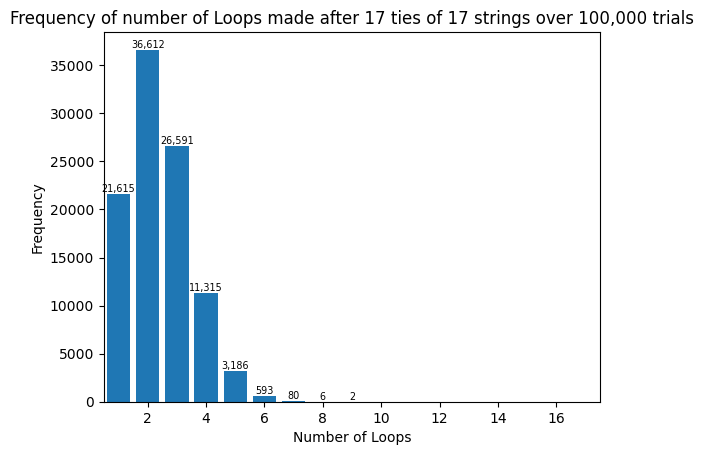

The average number of loops: 2.39986


In [7]:
samples = 100_000

results = trials(n, k, samples)
total = sum(results)
average = np.divide(total, samples)

refined = Counter(results)
sortedrefined = dict(sorted(refined.items())) # Sorts and categorises the results
nums = list(sortedrefined.keys())
frequences = list(sortedrefined.values())

plt.bar(nums, frequences, width=0.8)
plt.title("Frequency of number of Loops made after %s ties of %s strings over %s trials" %(k,n,f'{samples:,}'))
plt.xlabel("Number of Loops")
plt.ylabel("Frequency")
plt.ylim(ymin=0)
plt.xlim(xmax=k+0.5,xmin=nums[0] - 0.5)
for x in range(len(frequences)): # Adds text to the top of the bar
    plt.text(nums[x],frequences[x],f'{frequences[x]:,}', ha="center", va="bottom", size="x-small")
plt.show()
print("The average number of loops: %s" %average)